In [90]:
from utils import *
from clean.leases import *
from clean.merge_hmlr import *
from clean.rsi import *
import matplotlib.pyplot as plt

In [193]:
pd.options.display.float_format = '{:,}'.format

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [91]:
data_folder = "../data/original"

In [51]:
rsi = pd.read_pickle(f"{data_folder}/working/rsi_yearly.p")
rsi_postcode = pd.read_pickle(f"{data_folder}/working/rsi_postcode.p")

In [53]:
rsi = rsi[rsi.radius==0.1]
rsi = rsi[rsi.d_rsi.notna()]
rsi_postcode = rsi_postcode[rsi_postcode.d_rsi.notna()]

In [54]:
len(rsi)

25203

In [55]:
len(rsi_postcode)

10862

In [56]:
df = rsi.merge(rsi_postcode, on=['property_id','date_trans'], indicator=True, how='outer', suffixes=('','_pc'))

In [57]:
df._merge.value_counts()

_merge
left_only     14341
both          10862
right_only        0
Name: count, dtype: int64

In [78]:
# df = pd.read_pickle(f"{data_folder}/clean/experiments.p")

ystars = []
ses = []
xaxis = []

baseline = []

# for year in range(2004,2024):
#     y, se = estimate_ystar(df[df.year==year].copy(), lhs_var="did_rsi_postcode")
#     ystars.append(y)
#     ses.append(se)
#     xaxis.append(year)

#     y_base, se = estimate_ystar(df[(df.year==year)&(df.did_rsi_postcode.notna())].copy(), lhs_var="did_rsi_yearly")
#     baseline.append(y_base)


for year in range(2005,2025,5):
    y, se = estimate_ystar(df[df.year5==year].copy(), lhs_var="did_rsi_postcode")
    ystars.append(y)
    ses.append(se)
    xaxis.append(year)

    y_base, se = estimate_ystar(df[(df.year5==year)&(df.did_rsi_postcode.notna())].copy(), lhs_var="did_rsi_yearly")
    baseline.append(y_base)

ystars = np.array(ystars)
ses = np.array(ses)

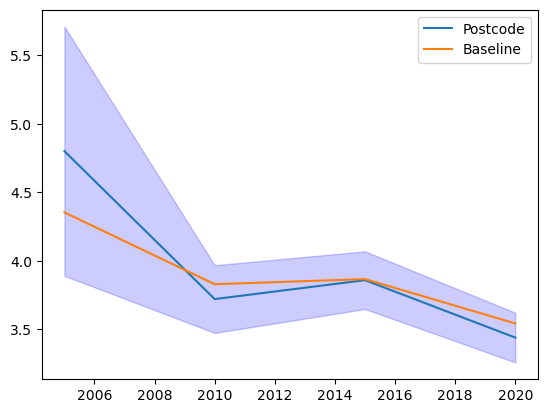

In [79]:
plt.plot(xaxis, ystars, label='Postcode')
plt.plot(xaxis, baseline, label='Baseline')
plt.fill_between(xaxis, ystars - 1.96*ses, ystars + 1.96*ses, color='blue', alpha=0.2)
plt.legend()
plt.show()

In [44]:
df[df._merge=='right_only'][['property_id','date_trans','L_date_trans_pc','d_log_price_pc','d_rsi_pc','radius_pc','num_controls_pc']]

,property_id,date_trans,L_date_trans_pc,d_log_price_pc,d_rsi_pc,radius_pc,num_controls_pc
8,1 1 SW6 2AP,2005-08-08,1997-04-18,0.730188,0.491323,20.0,3.0
21,1 10 SO17 2EY,2014-10-13,2010-07-18,0.021053,1.242706,20.0,12.0
37,1 105 W2 3HB,2000-07-21,1995-12-12,0.849351,0.709954,20.0,4.0
49,1 11 HG1 5LY,2017-11-08,2007-08-16,0.215427,-0.143812,20.0,12.0
57,1 110 N8 9DY,2012-03-27,2006-05-22,0.287682,-0.157080,20.0,12.0
...,...,...,...,...,...,...,...
26584,THE LOWER GROUND FLOOR AT 84 CR0 6PG,2015-12-22,2003-06-17,0.843970,0.186776,20.0,7.0
26592,THE WILLOWS 7 BH3 7AG,2015-07-17,2007-09-14,0.151400,0.816564,20.0,7.0
26653,TOP FLOOR 63 SW4 0NP,2007-10-08,1997-09-17,1.268511,-0.086505,20.0,8.0
26674,UPPER 49 TN4 9RB,2005-10-18,1997-08-29,1.098612,1.367825,20.0,10.0


In [33]:
lh = pd.read_pickle(f"{data_folder}/clean/leasehold_flats.p")

In [46]:
lh[(lh.postcode=='SW6 2AP')&(lh.L_year.notna())][['property_id','extension','year','L_year','date_trans','L_date_trans','d_log_price']].sort_values(by=['extension','L_date_trans'])

,property_id,extension,year,L_year,date_trans,L_date_trans,d_log_price
4735142,MAISONETTE B 14 SW6 2AP,False,1997,1995.0,1997-07-01,1995-06-01,0.336472
2225972,3 64 SW6 2AP,False,2001,1997.0,2001-09-06,1997-05-19,0.694384
4735143,MAISONETTE B 14 SW6 2AP,False,2008,1997.0,2008-08-05,1997-07-01,0.844378
1406304,2 64 SW6 2AP,False,2001,1997.0,2001-10-22,1997-10-13,0.667570
2225973,3 64 SW6 2AP,False,2003,2001.0,2003-06-16,2001-09-06,0.183374
1406305,2 64 SW6 2AP,False,2005,2001.0,2005-12-12,2001-10-22,0.226248
2157529,2D SW6 2AP,False,2006,2002.0,2006-03-22,2002-01-04,0.256122
840902,14 SW6 2AP,False,2006,2004.0,2006-12-08,2004-06-18,0.064159
2157530,2D SW6 2AP,False,2014,2006.0,2014-11-14,2006-03-22,0.681171
840903,14 SW6 2AP,False,2009,2006.0,2009-04-24,2006-12-08,-0.020619


In [300]:
folder = "/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/Submissions/AER/Revision1/data"

In [301]:
file = f"{folder}/geography/Westminster_Parliamentary_Constituencies_Dec_2021_UK_BUC_2022/PCON_DEC_2021_UK_BUC.shp"
gdf = gpd.read_file(file)

df = pd.read_csv(f"{folder}/hmrc/table_12_9_publication.csv", skiprows=3)
df = df[df['Number']!='[c]']
df = df[df['Parliamentary Constituency'].notna()]
df = df[df['Parliamentary Constituency']!='All']
df = df[~df.Region.isin(['Scotland','Wales'])]

gdf = gdf.merge(df, right_on=['Parliamentary Constituency'], left_on=['PCON21NM'], indicator=True, how='inner')

lpa_file = "/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/ystar/data/raw/ons/LAD_DEC_2021_UK_BFC/LAD_DEC_2021_UK_BFC.shp"
lpas = gpd.read_file(lpa_file)

pop = pd.read_excel("/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/Submissions/AER/Revision1/data/ons/sape23dt7mid2020parliconsyoaestimatesunformatted.xlsx", sheet_name="Mid-2020 Persons", skiprows=4)
pop = pop[['PCON11CD','All Ages']].rename(columns={'All Ages':'population'})
gdf = gdf.merge(pop, left_on='PCON21CD', right_on='PCON11CD', how='left')
gdf['inheritance_tax_pc'] = (gdf['Amount (£ million)'].astype(int) * 1e6)/gdf.population

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [302]:
join_gdf = gpd.sjoin(lpas, gdf, how='inner', predicate='intersects')

# Calculate intersection area
join_gdf['overlap_area'] = join_gdf.apply(
    lambda row: row['geometry'].intersection(
        gdf.loc[gdf['PCON21CD'] == row['PCON21CD'], 'geometry'].values[0]
    ).area, axis=1
)

join_gdf['weighted_value'] = join_gdf['inheritance_tax_pc'] * join_gdf['overlap_area']


lpa_means = (
    join_gdf.groupby('LAD21CD')
    .apply(lambda x: x['weighted_value'].sum() / x['overlap_area'].sum())
    .reset_index(name='inheritance_tax_pc')
)

lpa_areas = join_gdf.groupby('LAD21CD')['overlap_area'].sum().reset_index(name='overlap_area')

# Merge back to `lpas` to associate each LPA with its calculated weighted average
lpas = lpas.merge(lpa_means, on='LAD21CD')
lpas = lpas.merge(lpa_areas, on='LAD21CD')
lpas['area_sh'] = lpas['overlap_area']/lpas.geometry.area

/var/folders/3r/jb8bgfvs28z_p7ck_xlm91j00000gn/T/ipykernel_12828/3417912271.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['weighted_value'].sum() / x['overlap_area'].sum())


In [303]:
# Drop areas for which most of LPAs does not have data 
lpas.drop(lpas[lpas.area_sh < 0.5].index, inplace=True)

# Rescale by LPA population to get average inheritance tax by LPA
lpa_pop_file = "/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/Submissions/AER/Revision1/data/ons/lad_population_2021.xlsx"
lpa_pop = pd.read_excel(lpa_pop_file, skiprows=5, skipfooter=2)
lpa_pop = lpa_pop[['LA code', 'All persons\n(number)', 'Aged 65 years and over\n(number)']].rename(columns={'All persons\n(number)':'lpa_population', 'Aged 65 years and over\n(number)':'lpa_pop_65plus'})
lpas = lpas.merge(lpa_pop, left_on='LAD21CD', right_on='LA code', how='left')

In [304]:
lpa_inc_file = "/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/ystar/data/raw/ons/ashe/ashetable72021revised/Work Geography Table 7.1a   Weekly pay - Gross 2021.xls"
lpa_inc = pd.read_excel(lpa_inc_file, sheet_name="All", skiprows=4)
lpa_inc = lpa_inc[['Code','Mean']].rename(columns={'Code':'LAD_Code', 'Mean':'avg_weekly_earnings'})
lpa_inc['avg_weekly_earnings'] = pd.to_numeric(lpa_inc.avg_weekly_earnings,errors='coerce')
lpas = lpas.merge(lpa_inc, left_on='LAD21CD', right_on='LAD_Code', how='left')

In [305]:
lpas['inheritance_tax_sh'] = lpas['inheritance_tax_pc']/(lpas['avg_weekly_earnings']*52)
lpas['inheritance_tax_sh_adj'] = (lpas['inheritance_tax_pc'] * lpas['lpa_population'] / lpas['lpa_pop_65plus'] ) /(lpas['avg_weekly_earnings']*52)

In [306]:
lpas = lpas[['LAD21CD','inheritance_tax_sh', 'inheritance_tax_sh_adj', 'inheritance_tax_pc', 'avg_weekly_earnings', 'lpa_population', 'lpa_pop_65plus']].rename(columns={'LAD21CD':'lpa_code'})
lpas.to_stata("/Users/vbp/Princeton Dropbox/Veronica Backer Peral/Research/natural-rate/Submissions/AER/Revision1/data/clean/inheritance_tax.dta")

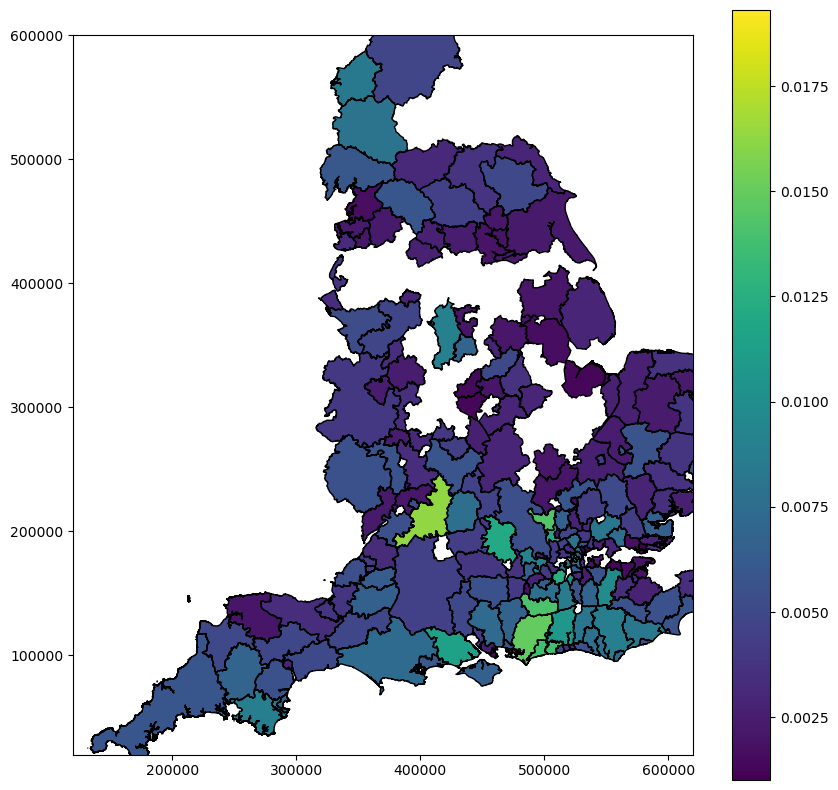

In [278]:
fig, ax = plt.subplots(figsize=(10, 10))
lpas.plot(column='inheritance_tax_sh', ax=ax, legend=True) 
lpas.plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_xlim([120_000, 620_000])
ax.set_ylim([20_000, 600_000])

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='gray')
gdf.plot(ax=ax, color='lightblue', edgecolor="blue")
lpas.plot(ax=ax, facecolor="none", edgecolor="black")


lpas[lpas.LAD21CD=='E06000006'].plot(ax=ax, facecolor="none", edgecolor="red")

ax.set_xlim([120_000, 620_000])
ax.set_ylim([20_000, 600_000])

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='gray')
gdf.plot(column='inheritance_tax_pc', ax=ax, legend=True) 
lpas.plot(ax=ax, facecolor="none", edgecolor="black")

lpas[lpas.LAD21CD=='E09000031'].plot(ax=ax, facecolor="none", edgecolor="red")
# gdf[gdf.PCON21CD=='E14000987'].plot(ax=ax, facecolor="none", edgecolor="green")

# ax.set_xlim([120_000, 620_000])
# ax.set_ylim([20_000, 600_000])

ax.set_xlim([500_000, 570_000])
ax.set_ylim([150_000, 250_000])

plt.show()